# Loan Prediction using Repeated Stratified KFolds - Utkarsh Gaikwad

# Read Training dataset

In [1]:
import pandas as pd
df_train = pd.read_csv('./Input/training_set.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Checking DataFrame info

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Converting Credit History to object

In [3]:
crd_hst = []
for i in range(len(df_train)):
    if df_train['Credit_History'][i]==1:
        crd_hst.append('Yes')
    elif df_train['Credit_History'][i]==0:
        crd_hst.append('No')
    else:
        crd_hst.append(None)
df_train['Credit_History']=crd_hst

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


# Drop statistically insignificant id Column

In [5]:
df_train = df_train.drop(labels=['Loan_ID'],axis=1)

# Check NaN values

In [6]:
df_train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Replacing Missing Data

In [7]:
from definitions import replacer
replacer(df_train)

Missing Values replaced in DataFrame


In [8]:
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory data analysis

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5405.540850,6108.923986,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1620.888940,2926.235009,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0


In [10]:
df_train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Univariate Analysis 

In [11]:
# Seperating categorical and continuous variables
from definitions import catconsep
cat, con = catconsep(df_train)

Categorical and Continuous variables appended


In [12]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [13]:
con

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

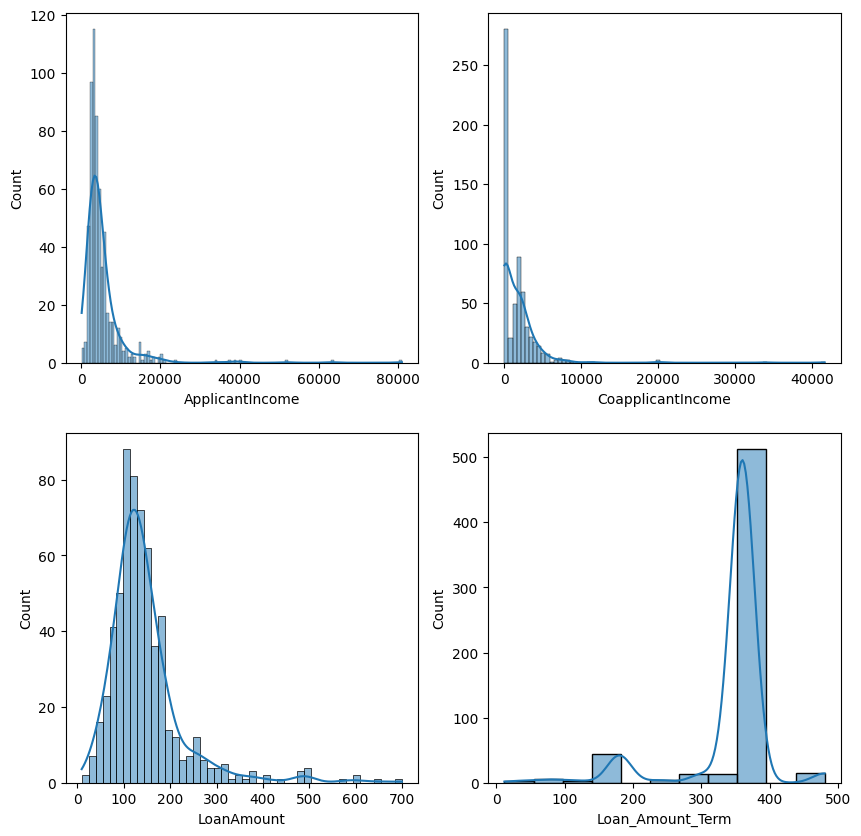

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
x=1
plt.figure(figsize=(10,10))
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sb.histplot(df_train[i],kde=True)
plt.show()


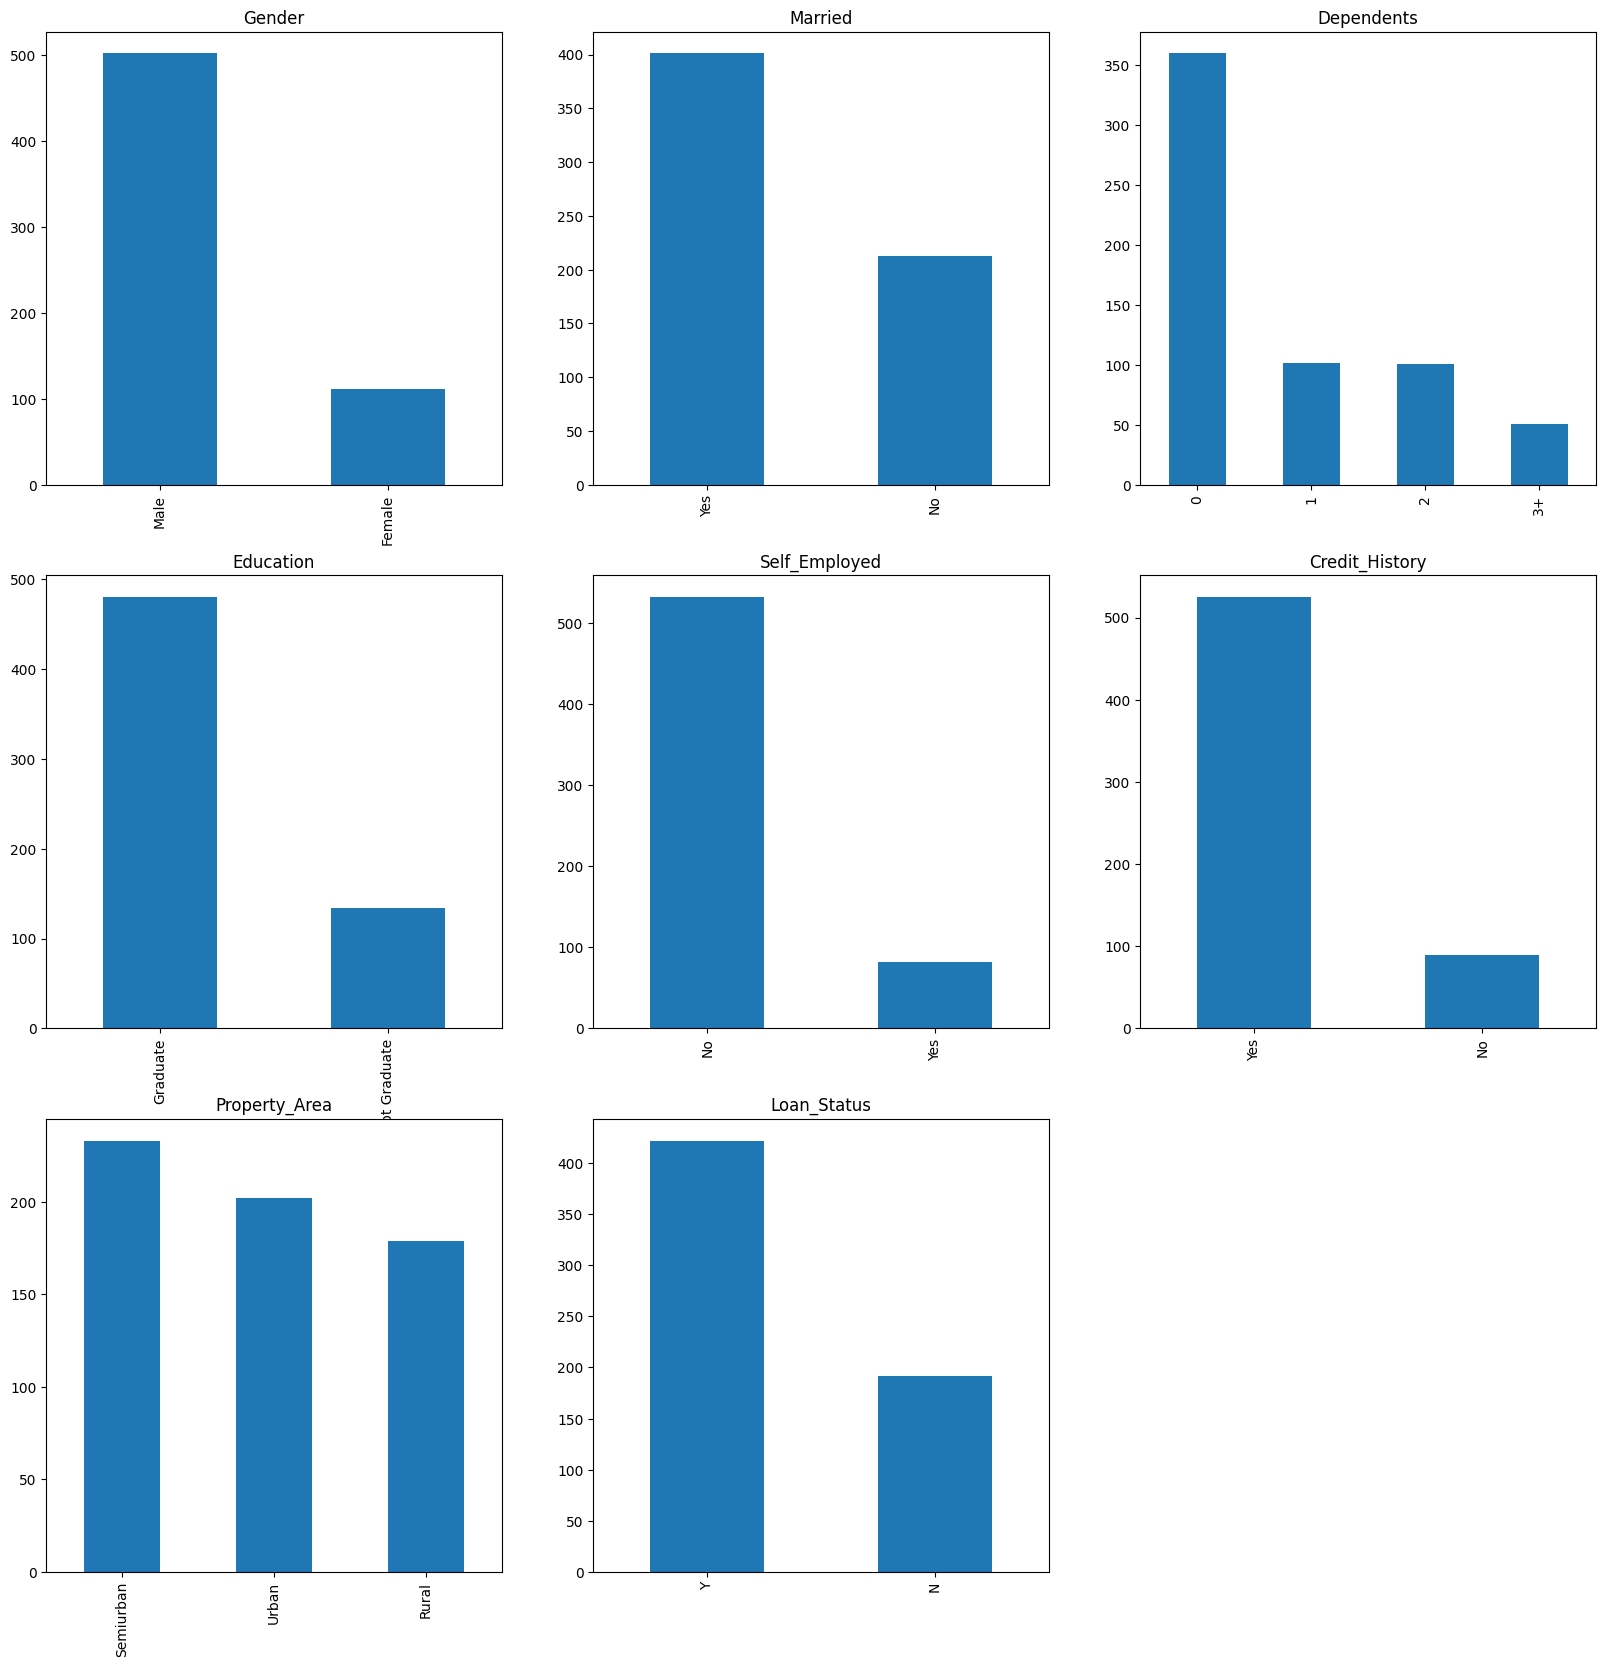

In [15]:
x=1
plt.figure(figsize=(20,20))
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    df_train[i].value_counts().plot(kind='bar',title=i)
plt.show()

# Bivariate Analysis

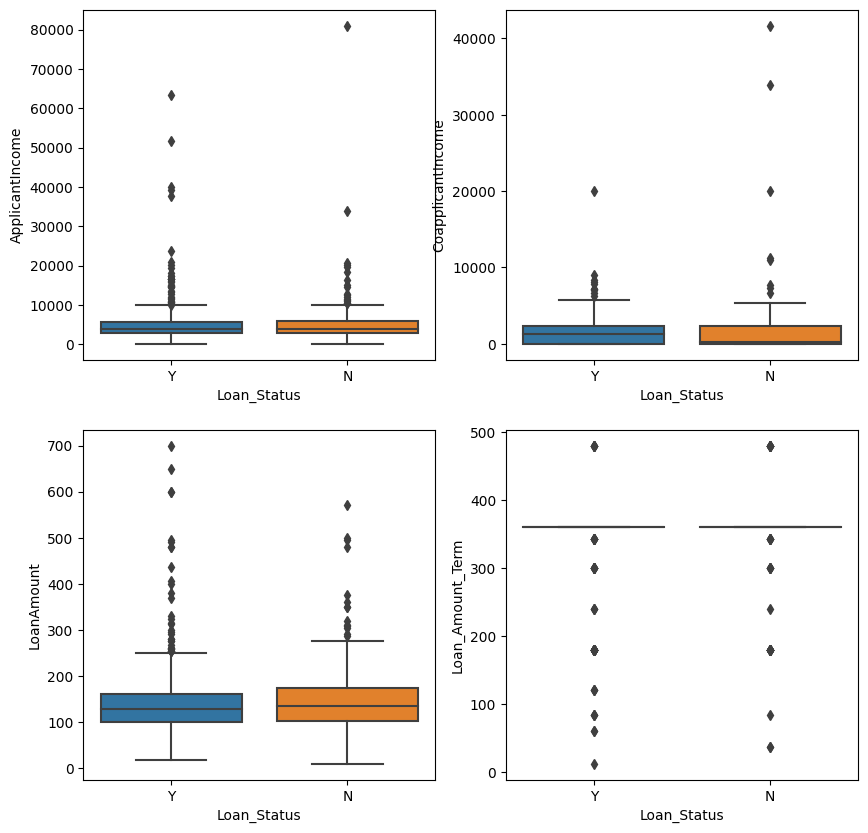

In [16]:
x=1
plt.figure(figsize=(10,10))
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sb.boxplot(data = df_train, x='Loan_Status',y=i)
plt.show()

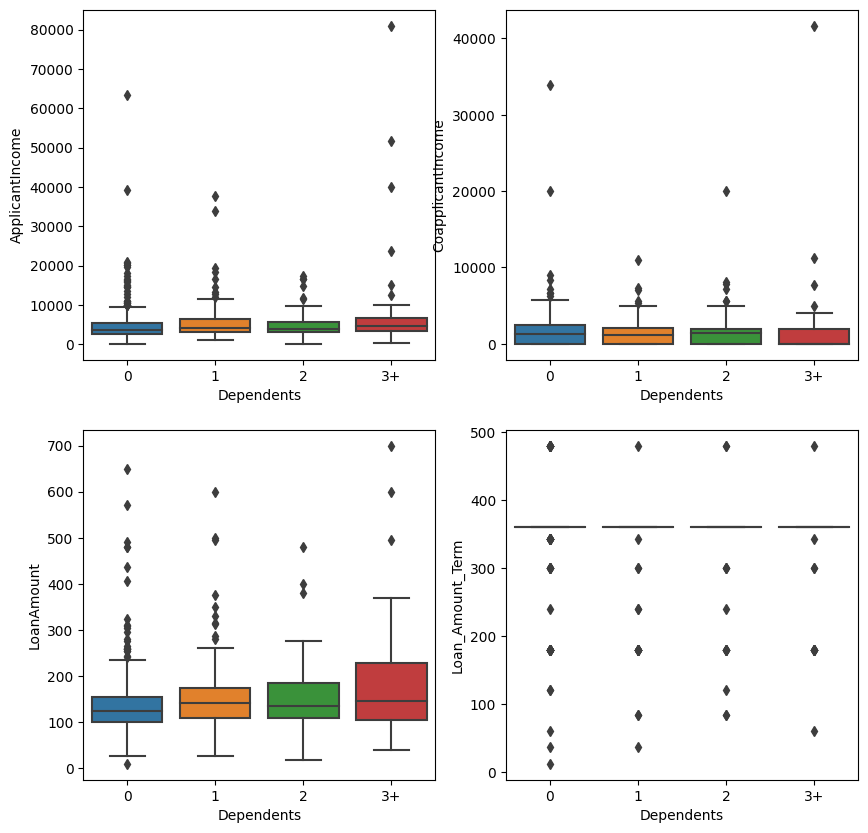

In [17]:
x=1
plt.figure(figsize=(10,10))
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sb.boxplot(data = df_train, x='Dependents',y=i)
plt.show()

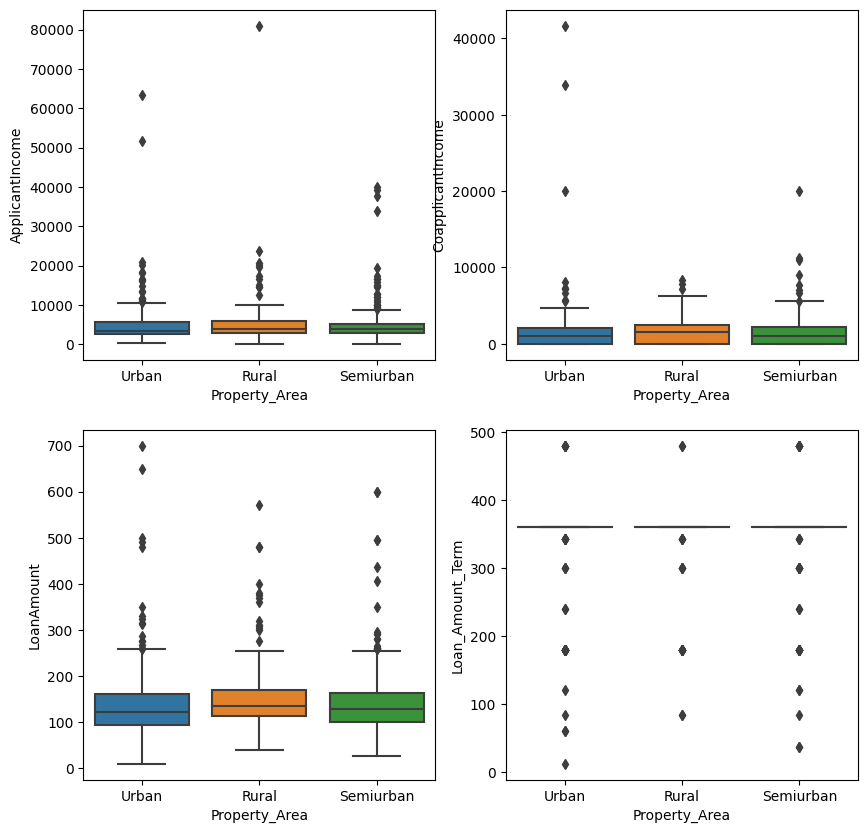

In [18]:
x=1
plt.figure(figsize=(10,10))
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sb.boxplot(data = df_train, x='Property_Area',y=i)
plt.show()

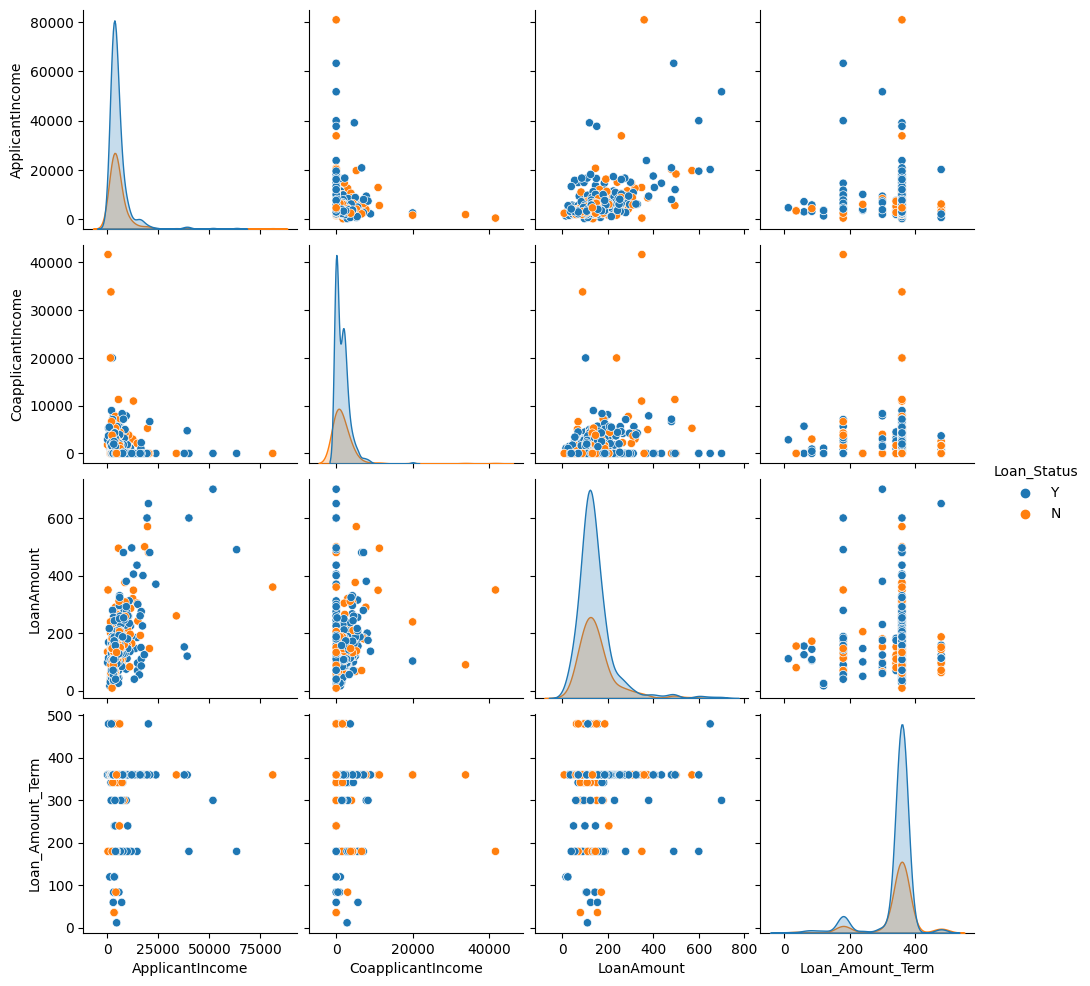

In [19]:
sb.pairplot(df_train,hue='Loan_Status')
plt.show()

# Continuous Variable Correlation

In [20]:
cr = df_train[con].corr()
cr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710
LoanAmount,0.565552,0.187884,1.000000,0.038801
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000


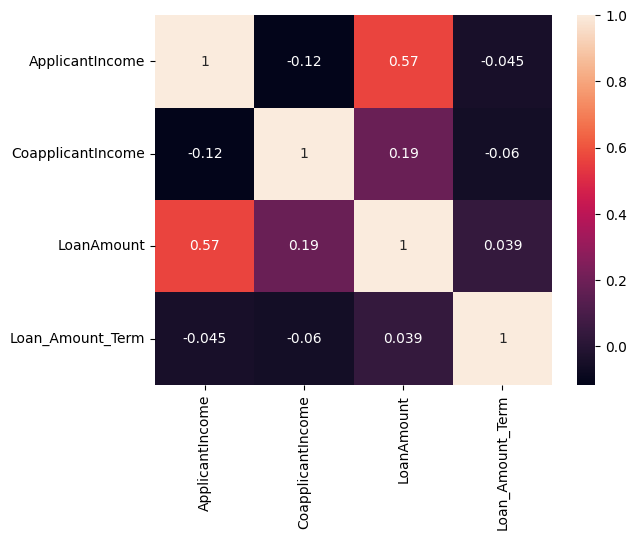

In [21]:
sb.heatmap(cr,annot=True)
plt.show()

# Performing ANOVA for column Importance

In [22]:
from definitions import ANOVA
q = []
for i in con:
    q.append(ANOVA(df_train,'Loan_Status',i))

In [23]:
anv = pd.DataFrame({'Column':con,'pval':q})
anv.sort_values(by='pval')

,Column,pval
1,CoapplicantIncome,0.142390
2,LoanAmount,0.367688
3,Loan_Amount_Term,0.603963
0,ApplicantIncome,0.902518


# Performing ChiSquareTest for categorical variables

In [24]:
from definitions import chisquare
Q = []
for i in cat:
    Q.append(chisquare(df_train,'Loan_Status',i))

In [25]:

dc=pd.DataFrame({'Columns':cat,'Pval':Q})
dc.sort_values(by='Pval')

,Columns,Pval
7,Loan_Status,1.544676e-134
5,Credit_History,3.418350e-40
6,Property_Area,2.136019e-03
1,Married,2.960858e-02
3,Education,4.309962e-02
2,Dependents,3.688663e-01
0,Gender,7.391461e-01
4,Self_Employed,1.000000e+00


In [26]:
dc[dc.Pval<0.05]

,Columns,Pval
1,Married,2.960858e-02
3,Education,4.309962e-02
5,Credit_History,3.418350e-40
6,Property_Area,2.136019e-03
7,Loan_Status,1.544676e-134


# Defining X and Y

In [27]:
X = df_train.drop(labels=['Loan_Status'],axis=1)
Y = df_train[['Loan_Status']]

# Data Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y['Loan_Status']),columns=Y.columns)

In [29]:
Y.value_counts()

Loan_Status
1              422
0              192
dtype: int64

In [30]:
cat, con = catconsep(X)

Categorical and Continuous variables appended


In [31]:
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,5405.54085,1508.0,128.000000,360.0,0,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
2,3000.00000,0.0,66.000000,360.0,0,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
3,2583.00000,2358.0,120.000000,360.0,0,1,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
4,6000.00000,0.0,141.000000,360.0,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [32]:
Xnew.shape

(614, 21)

# Creating RepeatedStratifiedKFolds

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=42)

In [34]:
from sklearn.metrics import roc_auc_score
import numpy as np
from catboost import CatBoostClassifier

clfs = []
scores = []

for i, (train_index, test_index) in enumerate(rskf.split(Xnew, Y)):
    xtrain, xtest = Xnew.iloc[train_index,:], Xnew.iloc[test_index,:]
    ytrain, ytest = Y.iloc[train_index,:],Y.iloc[test_index,:]
    cbc = CatBoostClassifier(iterations=1000,verbose=False)
    cbc.fit(xtrain, ytrain, eval_set = [(xtest, ytest)])
    preds = cbc.predict_proba(xtest)[:,-1]
    clfs.append(cbc)
    scr = roc_auc_score(ytest,preds)
    scores.append(scr)
    print('******************************')
    print('Fold : ',i , 'ROC AUC : ',round(scr,5))
print(f'\n\nMean score: {np.mean(scores)}')          

******************************
Fold :  0 ROC AUC :  0.78421
******************************
Fold :  1 ROC AUC :  0.74675
******************************
Fold :  2 ROC AUC :  0.76221
******************************
Fold :  3 ROC AUC :  0.70757
******************************
Fold :  4 ROC AUC :  0.80232
******************************
Fold :  5 ROC AUC :  0.78111
******************************
Fold :  6 ROC AUC :  0.79195
******************************
Fold :  7 ROC AUC :  0.81105
******************************
Fold :  8 ROC AUC :  0.76068
******************************
Fold :  9 ROC AUC :  0.8006
******************************
Fold :  10 ROC AUC :  0.77492
******************************
Fold :  11 ROC AUC :  0.77059
******************************
Fold :  12 ROC AUC :  0.71703
******************************
Fold :  13 ROC AUC :  0.75305
******************************
Fold :  14 ROC AUC :  0.75
******************************
Fold :  15 ROC AUC :  0.74087
******************************
Fold : 

# Checking with Logistic Regression base model

In [40]:
# Scaling The continuous variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1n = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2n = pd.get_dummies(X[cat])
Xnew2 = X1n.join(X2n)

In [42]:
from sklearn.linear_model import LogisticRegression
clfs_lr = []
scores_lr = []

for i, (train_index, test_index) in enumerate(rskf.split(Xnew2, Y)):
    xtrain, xtest = Xnew2.iloc[train_index,:], Xnew2.iloc[test_index,:]
    ytrain, ytest = Y.iloc[train_index,:],Y.iloc[test_index,:]
    lr = LogisticRegression()
    lr.fit(xtrain, ytrain.values.flatten())
    preds = lr.predict_proba(xtest)[:,-1]
    clfs_lr.append(lr)
    scr = roc_auc_score(ytest.values.flatten(),preds)
    scores_lr.append(scr)
    print('******************************')
    print('Fold : ',i , 'ROC AUC : ',round(scr,5))
print(f'\n\nMean score: {np.mean(scores_lr)}')     

******************************
Fold :  0 ROC AUC :  0.76223
******************************
Fold :  1 ROC AUC :  0.71424
******************************
Fold :  2 ROC AUC :  0.75214
******************************
Fold :  3 ROC AUC :  0.73657
******************************
Fold :  4 ROC AUC :  0.7901
******************************
Fold :  5 ROC AUC :  0.71424
******************************
Fold :  6 ROC AUC :  0.79443
******************************
Fold :  7 ROC AUC :  0.77381
******************************
Fold :  8 ROC AUC :  0.75336
******************************
Fold :  9 ROC AUC :  0.78321
******************************
Fold :  10 ROC AUC :  0.71672
******************************
Fold :  11 ROC AUC :  0.813
******************************
Fold :  12 ROC AUC :  0.68742
******************************
Fold :  13 ROC AUC :  0.76435
******************************
Fold :  14 ROC AUC :  0.7641
******************************
Fold :  15 ROC AUC :  0.73963
******************************
Fold : 

# Tuning Logistic Regression Model

In [57]:
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none','l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
search = RandomizedSearchCV(lr, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=rskf, random_state=1)
search.fit(Xnew2,Y)

e:\Loan Stratified KFold\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5900 fits failed out of a total of 12500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1325 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Loan Stratified KFold\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Loan Stratified KFold\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "e:\Loan Stratified KFold\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=42),
                   estimator=LogisticRegression(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BF597D0F10>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='roc_auc')

In [60]:
search.best_estimator_

LogisticRegression(C=0.008301451461243866, penalty='none', solver='newton-cg')

In [61]:
search.best_score_

0.7529523922929495

# Checking Entire model with Catboost

In [63]:
y_prob = []
for clf in clfs:
    preds = clf.predict_proba(Xnew)
    y_prob.append(preds[:,1])
y_prob = np.stack(y_prob).mean(0)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y,y_prob)

0.9657138625592417

In [67]:
y_pred = []
for i in y_prob:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

# Classification report

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62       192
           1       0.80      0.99      0.88       422

    accuracy                           0.82       614
   macro avg       0.87      0.72      0.75       614
weighted avg       0.84      0.82      0.80       614



# Confusion Matrix

<AxesSubplot: >

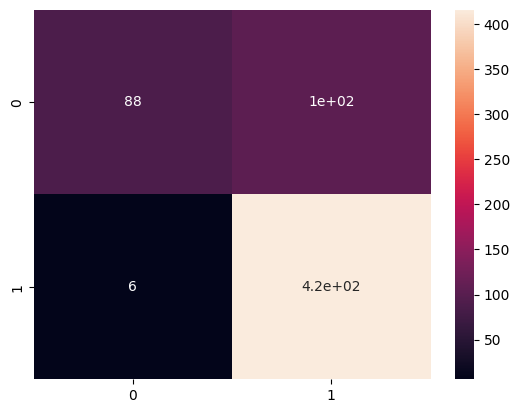

In [69]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y,y_pred)
sb.heatmap(cf,annot=True)

# Predicting for Test Dataset

In [70]:
df_test = pd.read_csv('./Input/testing_set.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [71]:
crd_hst1 = []
for i in range(len(df_test)):
    if df_test['Credit_History'][i]==1:
        crd_hst1.append('Yes')
    elif df_test['Credit_History'][i]==0:
        crd_hst1.append('No')
    else:
        crd_hst1.append(None)
df_test['Credit_History']=crd_hst1

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    object 
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 34.5+ KB


In [73]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [74]:
replacer(df_test)

Missing Values replaced in DataFrame


In [75]:
Xts = df_test.drop(labels=['Loan_ID'],axis=1)

In [76]:
Xt1 = Xts[con]
Xt2 = pd.get_dummies(Xts[cat])
XtsNew = Xt1.join(Xt2)
XtsNew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,3076,1500,126.0,360.0,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
2,5000,1800,208.0,360.0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,2340,2546,100.0,360.0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
4,3276,0,78.0,360.0,0,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,1


In [78]:
XtsNew.shape

(367, 21)

In [79]:
Xnew.shape

(614, 21)

In [80]:
final_prob = []
for clf in clfs:
    preds = clf.predict_proba(XtsNew)
    final_prob.append(preds[:,1])

In [82]:
final_prob = np.stack(final_prob).mean(0)

In [84]:
final_pred = []
for i in final_prob:
    if i>=0.5:
        final_pred.append(1)
    else:
        final_pred.append(0)

In [91]:
len(final_prob[final_prob>=0.5])

308

In [92]:
len(final_prob[final_prob<0.5])

59

In [94]:
final_pred_d = le.inverse_transform(final_pred)

# Creating Final DataFrame

In [95]:
df_final = pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':final_pred_d,'Probability':final_prob})
df_final.head()

,Loan_ID,Loan_Status,Probability
0,LP001015,Y,0.778212
1,LP001022,Y,0.825806
2,LP001031,Y,0.787801
3,LP001035,Y,0.847289
4,LP001051,Y,0.680090


# Saving File to CSV

In [96]:
df_final.to_csv('output.csv',index=False)